In [94]:
import pandas as pd
import numpy as np
import requests
from scipy.stats import pearsonr
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

## Features

In [2]:
features = pd.read_csv('fma_metadata/features.csv',low_memory=False)
features=features.iloc[3:106577].reset_index(drop=True).rename(columns={'feature':'track_id'})
features['track_id']=features['track_id'].astype(int)
features

,track_id,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
1,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02
2,5,5.2756297588e-01,-7.7654317021e-02,-2.7961030602e-01,6.8588310480e-01,1.9375696182e+00,8.8083887100e-01,-9.2319184542e-01,-9.2723226547e-01,6.6661673784e-01,...,4.0730185807e-02,1.2690781616e-02,1.4759079553e-02,6.8084154129e+00,3.7500000000e-01,5.3114086390e-02,4.1503906250e-02,0.0000000000e+00,2.1933031082e+00,4.4860601425e-02
3,10,3.7022454739e+00,-2.9119303823e-01,2.1967420578e+00,-2.3444947600e-01,1.3673638105e+00,9.9841135740e-01,1.7706941366e+00,1.6045658588e+00,5.2121698856e-01,...,7.4357867241e-02,1.7951935530e-02,1.3921394013e-02,2.1434211731e+01,4.5214843750e-01,7.7514506876e-02,7.1777343750e-02,0.0000000000e+00,3.5423245430e+00,4.0800448507e-02
4,20,-1.9383698702e-01,-1.9852678478e-01,2.0154602826e-01,2.5855624676e-01,7.7520370483e-01,8.4794059396e-02,-2.8929358721e-01,-8.1641042233e-01,4.3850939721e-02,...,9.5002755523e-02,2.2492416203e-02,2.1355332807e-02,1.6669036865e+01,4.6972656250e-01,4.7224905342e-02,4.0039062500e-02,9.7656250000e-04,3.1898307800e+00,3.0992921442e-02
5,26,-6.9953453541e-01,-6.8415790796e-01,4.8824872822e-02,4.2658798397e-02,-8.1896692514e-01,-9.1712284088e-01,-9.0183424950e-01,-6.6844828427e-02,-2.9103723168e-01,...,1.0371652246e-01,2.5541320443e-02,2.3846302181e-02,4.1645809174e+01,2.5048828125e-01,1.8387714401e-02,1.5625000000e-02,0.0000000000e+00,4.6905956268e+00,1.4598459937e-02
6,30,-7.2148716450e-01,-8.4855991602e-01,8.9090377092e-01,8.8619679213e-02,-4.4551330805e-01,-1.2711701393e+00,-1.2401897907e+00,-1.3437650204e+00,-9.0560036898e-01,...,1.4169253409e-01,2.0426128060e-02,2.5417611003e-02,8.1665945053e+00,5.4687500000e-01,5.4416511208e-02,3.6132812500e-02,2.4414062500e-03,2.2447082996e+00,5.2673552185e-02
7,46,-1.1970755458e-01,-8.5881441832e-01,2.3625464439e+00,1.0658428818e-01,-1.3159115314e+00,-1.2203541994e+00,-1.6681618690e+00,-5.1603251696e-01,-5.3639507294e-01,...,1.3263167441e-01,3.3211655915e-02,2.1309997886e-02,1.4731082916e+01,2.2363281250e-01,3.6600999534e-02,3.2226562500e-02,0.0000000000e+00,2.8487360477e+00,2.0713411272e-02
8,48,-1.0540534258e+00,9.3233942986e-01,5.2806353569e-01,-1.0353376865e+00,-1.0006815195e+00,-1.1193039417e+00,1.1669902802e+00,-1.0026028156e+00,-1.0949990749e+00,...,1.4195451140e-01,2.4653503671e-02,2.5202710181e-02,2.4550788879e+01,3.7158203125e-01,3.3015336841e-02,2.2460937500e-02,0.0000000000e+00,4.4067325592e+00,3.9016269147e-02
9,134,9.1844475269e-01,6.7414724827e-01,5.7781827450e-01,1.2811170816e+00,9.3374562263e-01,7.8176945448e-02,1.1992042065e+00,-1.7522314191e-01,9.2548191547e-01,...,5.8766160160e-02,1.6322381794e-02,1.5819497406e-02,4.7310867310e+00,4.1943359375e-01,6.4369551837e-02,5.0781250000e-02,0.0000000000e+00,1.8061059713e+00,5.4622855037e-02


## Tracks

In [3]:
tracks = pd.read_csv('fma_metadata/tracks.csv',low_memory=False)
tracks.columns = ['track_id']+list(tracks.iloc[0])[1:]
tracks = tracks.iloc[2:].reset_index(drop=True)
tracks

,track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
5,26,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,1060,en,Attribution-NonCommercial-NoDerivatives (aka M...,193,NaN,4,NaN,[],Where is your Love?
6,30,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,718,en,Attribution-NonCommercial-NoDerivatives (aka M...,612,NaN,5,NaN,[],Too Happy
7,46,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,252,en,Attribution-NonCommercial-NoDerivatives (aka M...,171,NaN,8,NaN,[],Yosemite
8,48,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,247,en,Attribution-NonCommercial-NoDerivatives (aka M...,173,NaN,9,NaN,[],Light of Light
9,134,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1126,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,943,NaN,5,NaN,[],Street Music


In [4]:
tracksSubset = tracks[['track_id','favorites','listens','name','title','duration','genre_top']]
tracksSubset.columns = ['track_id','favorites_1','favorites_2','favorites_2','listens_1','listens_2','artist','album','title','duration','genre']
tracksSubset['track_id']=tracksSubset['track_id'].astype(int)
tracksSubset

C:\Users\ibiyt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,track_id,favorites_1,favorites_2,favorites_2,listens_1,listens_2,artist,album,title,duration,genre
0,2,4,9,2,6073,1293,AWOL,AWOL - A Way Of Life,Food,168,Hip-Hop
1,3,4,9,1,6073,514,AWOL,AWOL - A Way Of Life,Electric Ave,237,Hip-Hop
2,5,4,9,6,6073,1151,AWOL,AWOL - A Way Of Life,This World,206,Hip-Hop
3,10,4,74,178,47632,50135,Kurt Vile,Constant Hitmaker,Freeway,161,Pop
4,20,2,10,0,2710,361,Nicky Cook,Niris,Spiritual Level,311,NaN
5,26,2,10,0,2710,193,Nicky Cook,Niris,Where is your Love?,181,NaN
6,30,2,10,0,2710,612,Nicky Cook,Niris,Too Happy,174,NaN
7,46,2,10,0,2710,171,Nicky Cook,Niris,Yosemite,104,NaN
8,48,2,10,0,2710,173,Nicky Cook,Niris,Light of Light,205,NaN
9,134,4,9,3,6073,943,AWOL,AWOL - A Way Of Life,Street Music,207,Hip-Hop


## Echohonest

In [5]:
echohonest = pd.read_csv('fma_metadata/echonest.csv',low_memory=False)
echohonest.columns = ['track_id']+list(echohonest.iloc[1])[1:]
echohonest=echohonest.iloc[3:].reset_index(drop=True)
echohonest['track_id']=echohonest['track_id'].astype(int)
echohonest

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,...,214,215,216,217,218,219,220,221,222,223
0,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,...,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
1,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,...,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
2,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,NaN,...,-2.2883579731,11.5271091461,0.2568213642,0.2378199995,0.0601223968,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047
3,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,2008-03-11,...,-3.6629877090,21.5082283020,0.2833518982,0.2670699954,0.1257044971,0.0808200017,8.4140100479,8.3331899643,21.3170642853,483.4038085938
4,134,0.4522173071,0.5132380502,0.5604099311,0.0194426943,0.0965666940,0.5255193792,114.2900000000,0.8940722715,NaN,...,-1.4526963234,2.3563981056,0.2346863896,0.1995500028,0.1493317783,0.0644000024,11.2670698166,11.2026700974,26.4541797638,751.1477050781
5,139,0.1065495253,0.2609111726,0.6070668636,0.8350869898,0.2236762711,0.0305692764,196.9610000000,0.1602670903,NaN,...,-3.0786671638,12.4115667343,0.2708015740,0.2727000117,0.0252420790,0.0640399978,2.4366900921,2.3726501465,3.8970954418,37.8660430908
6,140,0.3763124975,0.7340790229,0.2656847734,0.6695811237,0.0859951222,0.0390682262,107.9520000000,0.6099912728,NaN,...,-0.9346956015,-0.2609805167,0.3222317100,0.2779799998,0.1367472708,0.0753299966,9.8627195358,9.7873897552,21.9816207886,562.2294311523
7,141,0.9636568796,0.4359329980,0.0756321472,0.3454934909,0.1056858694,0.0266578493,33.4770000000,0.1639499337,NaN,...,-0.4572981000,-0.1659618020,0.4375027716,0.3073900044,0.3687643409,0.0626299977,11.1888399124,11.1262102127,13.4815311432,232.9935455322
8,142,0.6628811246,0.3790654766,0.8238557796,0.9102661844,0.0887052551,0.0790903546,147.7810000000,0.0928676322,2005,...,-1.1256052256,1.4784175158,0.2158436328,0.2096599936,0.0157538950,0.0692100003,3.9110200405,3.8418099880,12.5985231400,346.8130493164
9,144,0.9090114288,0.4436425913,0.6419971681,0.9240916996,0.2676694513,0.0896589132,128.5370000000,0.7882507821,NaN,...,-3.4540562630,16.2473049164,0.2450227439,0.2260800004,0.0335089900,0.0706600025,2.9836699963,2.9130098820,10.1232194901,146.1457366943


## Develop Dataset

In [6]:
data = echohonest.join(tracksSubset,on='track_id',rsuffix='_tracks')
data=data.join(features,on='track_id',rsuffix='_features')
data=data.loc[pd.notnull(data['zcr'])]
data

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,...,4.0730185807e-02,1.2690781616e-02,1.4759079553e-02,6.8084154129e+00,3.7500000000e-01,5.3114086390e-02,4.1503906250e-02,0.0000000000e+00,2.1933031082e+00,4.4860601425e-02
1,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,...,7.4357867241e-02,1.7951935530e-02,1.3921394013e-02,2.1434211731e+01,4.5214843750e-01,7.7514506876e-02,7.1777343750e-02,0.0000000000e+00,3.5423245430e+00,4.0800448507e-02
2,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,NaN,...,1.0371652246e-01,2.5541320443e-02,2.3846302181e-02,4.1645809174e+01,2.5048828125e-01,1.8387714401e-02,1.5625000000e-02,0.0000000000e+00,4.6905956268e+00,1.4598459937e-02
3,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,2008-03-11,...,1.0427882522e-01,1.6731236130e-02,2.0464096218e-02,-3.8451351225e-02,2.3486328125e-01,5.0837226212e-02,5.0781250000e-02,3.4179687500e-03,2.9787299037e-01,2.4899475276e-02
4,134,0.4522173071,0.5132380502,0.5604099311,0.0194426943,0.0965666940,0.5255193792,114.2900000000,0.8940722715,NaN,...,9.4193913043e-02,2.5454396382e-02,2.4314483628e-02,3.0865756989e+01,2.8955078125e-01,2.4377631024e-02,2.1484375000e-02,0.0000000000e+00,3.4717071056e+00,1.7285875976e-02
5,139,0.1065495253,0.2609111726,0.6070668636,0.8350869898,0.2236762711,0.0305692764,196.9610000000,0.1602670903,NaN,...,4.8420127481e-02,1.2018677779e-02,1.3362942263e-02,2.2104516983e+01,3.5156250000e-01,4.1945934296e-02,4.1015625000e-02,0.0000000000e+00,2.4523642063e+00,2.2306814790e-02
6,140,0.3763124975,0.7340790229,0.2656847734,0.6695811237,0.0859951222,0.0390682262,107.9520000000,0.6099912728,NaN,...,9.4936184585e-02,1.7981983721e-02,1.8081668764e-02,6.5131179810e+01,3.5546875000e-01,2.0734969527e-02,1.6113281250e-02,0.0000000000e+00,6.7704467773e+00,2.2794939578e-02
7,141,0.9636568796,0.4359329980,0.0756321472,0.3454934909,0.1056858694,0.0266578493,33.4770000000,0.1639499337,NaN,...,1.0069808364e-01,2.4719836190e-02,2.5330770761e-02,7.8092446327e+00,2.1142578125e-01,2.2630479187e-02,1.4160156250e-02,0.0000000000e+00,2.3571300507e+00,2.1741174161e-02
8,142,0.6628811246,0.3790654766,0.8238557796,0.9102661844,0.0887052551,0.0790903546,147.7810000000,0.0928676322,2005,...,7.5604803860e-02,2.2943336517e-02,1.9674122334e-02,6.7931208611e+00,2.1777343750e-01,2.9508940876e-02,2.3925781250e-02,0.0000000000e+00,1.9598083496e+00,1.9561327994e-02
9,144,0.9090114288,0.4436425913,0.6419971681,0.9240916996,0.2676694513,0.0896589132,128.5370000000,0.7882507821,NaN,...,7.4676580727e-02,1.7225183547e-02,1.7776522785e-02,1.6441637039e+01,2.6611328125e-01,3.9303906262e-02,3.5156250000e-02,0.0000000000e+00,2.9414050579e+00,2.3216716945e-02


In [109]:
response.dropna()

0              Hip-Hop
1                  Pop
3                 Rock
4                 Rock
5                 Rock
6                 Rock
7                 Rock
8                 Rock
9                 Rock
10                Rock
11                Rock
12                Rock
13                Rock
14                Rock
15                Rock
16                Rock
17                Rock
18                Rock
19                Rock
20                Rock
21                Rock
22                Rock
23                Rock
24                Rock
25                Rock
26                Rock
27                Rock
28                Rock
29          Electronic
30          Electronic
             ...      
12440     Experimental
12441     Experimental
12442     Experimental
12443     Experimental
12444     Experimental
12445     Experimental
12446     Experimental
12448     Experimental
12449     Experimental
12459       Electronic
12460       Electronic
12461    International
12462    In

In [91]:
data1 = data.drop(['track_id','album_date','album_name','release','artist','artist_name','album','title','genre','artist_location','artist_longitude','artist_latitude','artist_familiarity_rank','artist_discovery_rank','artist_hotttnesss_rank','song_currency_rank','song_hotttnesss_rank'],axis=1)
response = data['genre']
data1= data1.astype(float)

In [97]:
def dimReduction(data):
    pca = PCA(n_components=50)
    pca.fit(data)
    var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    for i in range(len(var1)):
        if i==0:
            continue
        if var1[i]-var1[i-1]<1:
            components=i
            break
    plt.plot(var1)
    plt.xlabel('Components')
    plt.ylabel('Cumulative Varaince Ratio')
    plt.title('Cumulative Variance Ratio of Principal Components (using {} components)'.format(components))
    pca = PCA(n_components=components)
    pca.fit(data)
    reducedData = pca.transform(data)
    return reducedData

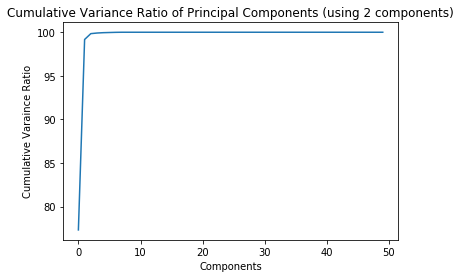

In [99]:
data2=dimReduction(data1)

In [107]:
reducedDf=pd.DataFrame(data2).rename(columns = {0:'component_1',1:'component_2'})
reducedDf['genre']=response
reducedDf.dropna()

,component_1,component_2,genre
0,-21078.255442,62794.776585,Hip-Hop
1,21856.792083,65390.842392,Pop
2,-24457.306220,62538.905939,NaN
3,-23779.075931,62418.820929,Rock
4,-23694.032046,62176.281834,Rock
5,-23700.984296,62163.740650,Rock
6,-23702.503162,62165.837682,Rock
7,-23699.960770,62163.524387,Rock
8,-25080.482068,62065.686649,Rock
9,-16079.203576,62678.341808,Rock


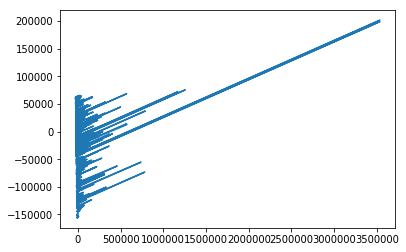

In [105]:
plt.figure()
plt.plot(data2[:,0],data2[:,1])